In [1]:
import os
# from google.colab import drive

In [91]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

### Read the data 

In [92]:
aggression_df = pd.read_csv('aggression_parsed_dataset.csv')
attack_df = pd.read_csv('attack_parsed_dataset.csv')
kaggle_df = pd.read_csv('kaggle_parsed_dataset.csv')
toxicity_df = pd.read_csv('toxicity_parsed_dataset.csv')
twitter_df = pd.read_csv('twitter_parsed_dataset.csv')
twitter_r_df = pd.read_csv('twitter_racism_parsed_dataset.csv')
twitter_s_df = pd.read_csv('twitter_sexism_parsed_dataset.csv')
youtube_df = pd.read_csv('youtube_parsed_dataset.csv')



In [93]:
# pd.read_csv()

### Data Cleaning

In [94]:
aggression_df.shape

(115864, 5)

In [95]:
aggression_df = aggression_df.drop(['index','ed_label_0','ed_label_1'],axis = 1)
aggression_df = aggression_df.rename(columns={'oh_label':'label'})


In [96]:
aggression_df['Source'] = aggression_df.shape[0]*['aggression_df']

In [97]:
aggression_df

,Text,label,Source
0,`- This is not ``creative``. Those are the di...,0,aggression_df
1,` :: the term ``standard model`` is itself le...,0,aggression_df
2,"True or false, the situation as of March 200...",0,aggression_df
3,"Next, maybe you could work on being less cond...",0,aggression_df
4,This page will need disambiguation.,0,aggression_df
...,...,...,...
115859,` These sources don't exactly exude a sense ...,0,aggression_df
115860,The Institute for Historical Review is a pee...,0,aggression_df
115861,:The way you're trying to describe it in this...,0,aggression_df
115862,== Warning == There is clearly a protection...,0,aggression_df


In [98]:
attack_df = attack_df.drop(['index','ed_label_0','ed_label_1'],axis = 1).rename(columns = {'oh_label':'label'})

In [99]:
attack_df['Source'] = attack_df.shape[0]*['attack_df']

In [100]:
attack_df.shape

(115864, 3)

In [101]:
kaggle_df.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [102]:
kaggle_df = kaggle_df.drop(['index','Date'],axis = 1).rename(columns = {'oh_label':'label'})

In [103]:
kaggle_df['Source'] = kaggle_df.shape[0]*['kaggle_df']

In [104]:
toxicity_df.head()

,index,Text,ed_label_0,ed_label_1,oh_label
0,0,This: :One can make an analogy in mathematical...,0.9,0.1,0
1,1,` :Clarification for you (and Zundark's righ...,1.0,0.0,0
2,2,Elected or Electoral? JHK,1.0,0.0,0
3,3,`This is such a fun entry. Devotchka I once...,1.0,0.0,0
4,4,Please relate the ozone hole to increases in c...,0.8,0.2,0


In [105]:
toxicity_df = toxicity_df.drop(['index','ed_label_0','ed_label_1'],axis = 1).rename(columns = {'oh_label':'label'})

In [106]:
toxicity_df['Source'] = toxicity_df.shape[0]*['toxicity_df']

In [107]:
toxicity_df.shape

(159686, 3)

In [108]:
twitter_df.head()

,index,id,Text,Annotation,oh_label
0,5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read...,none,0.0
1,5.71917888690393E+017,5.71917888690393E+017,@ShreyaBafna3 Now you idiots claim that people...,none,0.0
2,3.90255841338601E+017,3.90255841338601E+017,"RT @Mooseoftorment Call me sexist, but when I ...",sexism,1.0
3,5.68208850655916E+017,5.68208850655916E+017,"@g0ssipsquirrelx Wrong, ISIS follows the examp...",racism,1.0
4,5.75596338802373E+017,5.75596338802373E+017,#mkr No No No No No No,none,0.0


In [109]:
twitter_df = twitter_df.drop(['index','id','Annotation'],axis = 1).rename(columns = {'oh_label':'label'})

In [110]:
twitter_df['Source'] = twitter_df.shape[0]*['twitter_df']

In [111]:
youtube_df.head()

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [112]:
youtube_df = youtube_df.drop(['index','UserIndex','Number of Comments','Number of Subscribers','Membership Duration','Number of Uploads','Profanity in UserID','Age'],axis = 1).rename(columns = {'oh_label':'label'})

In [113]:
youtube_df['Source'] = youtube_df.shape[0]*['youtube_df']

In [114]:
youtube_df.shape

(3464, 3)

In [ ]:
k_suspicious_df = k_suspicious_df.rename(columns = {'message':'Text'})

In [ ]:
k_suspicious_df['Source'] = k_suspicious_df.shape[0]*['k_suspicious_df']

In [ ]:
k_suspicious_df.shape

### Merge all the files

In [115]:
merged_df = pd.concat([youtube_df,twitter_df,aggression_df,attack_df,kaggle_df,toxicity_df])

In [116]:
merged_df.shape

(420528, 3)

In [117]:
merged_df.isnull().sum()

Text      1
label     3
Source    0
dtype: int64

In [118]:
merged_df[merged_df['label'].isnull()]

,Text,label,Source
2992,RT @Lizzethismetal: Probably gonna piss off so...,NaN,twitter_df
2993,NaN,NaN,twitter_df
2994,1,NaN,twitter_df


In [119]:
merged_df = merged_df.reset_index()

In [120]:
merged_df[merged_df['label'].isnull()]

,index,Text,label,Source
6456,2992,RT @Lizzethismetal: Probably gonna piss off so...,NaN,twitter_df
6457,2993,NaN,NaN,twitter_df
6458,2994,1,NaN,twitter_df


In [121]:
merged_df = merged_df.drop('index',axis =1)

In [122]:
merged_df.iloc[6456:6459]

,Text,label,Source
6456,RT @Lizzethismetal: Probably gonna piss off so...,NaN,twitter_df
6457,NaN,NaN,twitter_df
6458,1,NaN,twitter_df


In [123]:
merged_df = merged_df.drop([6456,6457,6458],axis = 0)

In [124]:
merged_df.nunique()

Text      225346
label          2
Source         6
dtype: int64

In [125]:
import matplotlib.pyplot as plt

In [126]:
merged_df['label'].value_counts()

0.0    368221
1.0     52304
Name: label, dtype: int64

In [127]:
merged_df[merged_df['label'].isnull()]

,Text,label,Source


In [128]:
merged_df['label'] = merged_df['label'].astype(int)

In [129]:
merged_df.nunique()

Text      225346
label          2
Source         6
dtype: int64

(array([368221.,  52304.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

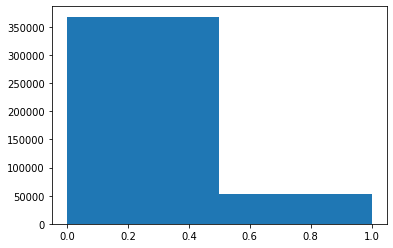

In [130]:
# Cyberbullying labels
plt.hist(merged_df['label'],bins =2)


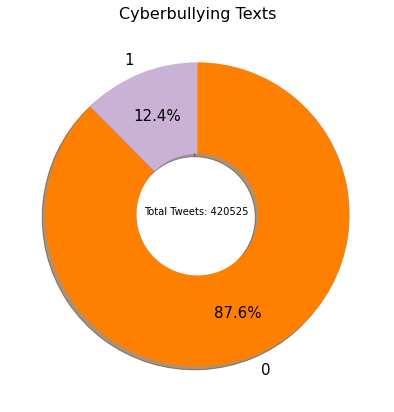

In [90]:
plt.figure(figsize = (7,7))
sorted_counts = merged_df['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.6},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.35, y = 0, s = 'Total Tweets: {}'.format(merged_df.shape[0]))
plt.title('Cyberbullying Texts', fontsize = 16);

In [131]:
merged_df.iloc[:,:-1].drop_duplicates(subset)

NameError: name 'subset' is not defined

### Remove Duplicates

In [132]:
merged_df_1 = merged_df[~(merged_df[['Text','label']].duplicated(keep='last'))]

In [133]:
#Both labels
merged_df_1[merged_df_1['Text'].duplicated(keep=False)].to_csv('check_duplicates.csv')

In [134]:
merged_df_2 = merged_df_1[~(merged_df_1['Text'].duplicated(keep=False))]

In [135]:
merged_df_2.to_csv('Final_merged_file.csv')

In [136]:
merged_df_2['label'].value_counts()

0    197640
1     21253
Name: label, dtype: int64

In [137]:
merged_df_2.shape

(218893, 3)

### Remove text with contradicting labels

In [138]:
merged_df_1[(merged_df_1['Text'].duplicated(keep=False))]['label'].value_counts()

0    6453
1    6453
Name: label, dtype: int64

In [139]:
import re

In [140]:
merged_df_2['Updated_Text'] = merged_df_2['Text'].map(lambda x: re.sub(r'\W+',' ', x)).str.lower()

<ipython-input-140-5c2d9c1362e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2['Updated_Text'] = merged_df_2['Text'].map(lambda x: re.sub(r'\W+',' ', x)).str.lower()


In [141]:
merged_df_2['Text'].map(lambda x: re.sub(r'[!,*)@#%(:&/$_?.=^]','', x))

0         Does Nebodyelse Hear her Crazy ass Screamin HO...
1         There are so many things that are incorrect wi...
2         326 hahah my boyfriend showed this song to me ...
3         dick beyonce fuck y a ass hole you are truely ...
4         DongHaeTaemin and Kai ;A; luhansehun and bacon...
                                ...                        
420523    `   These sources don't exactly exude a sense ...
420524      The Institute for Historical Review is a pee...
420525     The way you're trying to describe it in this ...
420526       Warning   There is clearly a protectionist ...
420527    Alternate option Is there perhaps enough newsw...
Name: Text, Length: 218893, dtype: object

In [142]:
merged_df_2['Text']

0         Does N.e.bodyelse Hear her Crazy ass Screamin ...
1         There are so many things that are incorrect wi...
2         3:26 hahah my boyfriend showed this song to me...
3         dick beyonce fuck y a ass hole you are truely ...
4         DongHaeTaemin and Kai ;A; luhansehun and bacon...
                                ...                        
420523    `   These sources don't exactly exude a sense ...
420524      The Institute for Historical Review is a pee...
420525     :The way you're trying to describe it in this...
420526      == Warning ==  There is clearly a protection...
420527    Alternate option=== Is there perhaps enough ne...
Name: Text, Length: 218893, dtype: object

In [143]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}


In [144]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    text = text.split() # to convert have'nt -> have not
    for i in range(len(text)):
        word = text[i]
        if word in contraction_mapping:
            text[i] = contraction_mapping[word]
    text = " ".join(text)
    text = text.replace("'s",'') # to convert your's -> your
    return text

In [145]:
re.sub(r"[^a-zA-Z0-9. '']",'',"gfcyfyug.!@#$%^&*()$'',.j") # remove punctuations

"gfcyfyug.''.j"

In [2]:
new_list_1 = []
# f = re.sub(r'[^a-zA-Z0-9. ]','',merged_df_2['Text'])
for t in merged_df_2['Text']:
    new_list_1.append(expand_contractions(re.sub(r"[^a-zA-Z0-9. '']",'',t)))
new_list_1
print('Output')

Output


In [76]:
merged_df_2['Updated_Text'] = new_list_1
merged_df_2['Updated_Text'] = merged_df_2['Updated_Text'].str.lower()

<ipython-input-76-440e57271bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2['Updated_Text'] = new_list_1
<ipython-input-76-440e57271bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2['Updated_Text'] = merged_df_2['Updated_Text'].str.lower()


In [147]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.externals import joblib

In [148]:
X_train, X_test, y_train, y_test = train_test_split(merged_df_2['Updated_Text'], 
                                                    merged_df_2['label'], 
                                                    random_state=42,
                                                   test_size = 0.2,
                                                   train_size = 0.8)

In [149]:
# X_train = merged_df_2['Updated_Text']

# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english', lowercase = True)

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [150]:
testing_data.shape

(43779, 221373)

In [151]:
training_data.shape

(175114, 221373)

In [152]:
X_train

221039     what happened during this edit war was a disa...
345346     passportguy passportguy the page www wonderli...
258028              no you re getting played like a fiddle 
254081     you really are a complete moron yo must be on...
340679     february 2009 ii i ve just noticed you ve rev...
                                ...                        
317319     that isn t a test it is legitimate informatio...
300473     you shouldn t of blocked user editor on wheel...
329994                merge both articles should be merged 
345506     phase two of the war on schumin we are enteri...
319509     goffs oak hi perhaps you could help then how ...
Name: Updated_Text, Length: 175114, dtype: object

In [153]:
chck = X_train.map(lambda x: re.sub(r'[!,*)@#%(:&/$_?.=^]','', x))

In [84]:
#Multinomial NB
MNB = MultinomialNB()
MNB.fit(training_data,y_train)
y_pred = MNB.predict(testing_data)


In [85]:
model = 'Naive Bayes'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred,y_test),3)))

Accuracy for Naive Bayes is 0.936
F1 Score for Naive Bayes is 0.636
Precision Score for Naive Bayes is 0.577
Recall Score for Naive Bayes is 0.708


In [86]:
# Bagging Classifier
BGC = BaggingClassifier()
BGC.fit(training_data,y_train)


BaggingClassifier()

In [87]:
y_pred_bgc = BGC.predict(testing_data)

In [88]:
model = 'Bagging Classifier'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred_bgc,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred_bgc,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred_bgc,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred_bgc,y_test),3)))

Accuracy for Bagging Classifier is 0.941
F1 Score for Bagging Classifier is 0.686
Precision Score for Bagging Classifier is 0.666
Recall Score for Bagging Classifier is 0.706


In [154]:
# AdaBoostClassifier
AdBC = AdaBoostClassifier()
AdBC.fit(training_data,y_train)

AdaBoostClassifier()

In [155]:
y_pred_adbc = AdBC.predict(testing_data)

In [156]:
model = 'AdaBoost Classifier'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred_adbc,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred_adbc,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred_adbc,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred_adbc,y_test),3)))

Accuracy for AdaBoost Classifier is 0.924
F1 Score for AdaBoost Classifier is 0.435
Precision Score for AdaBoost Classifier is 0.302
Recall Score for AdaBoost Classifier is 0.778


In [157]:
#RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(training_data,y_train)

RandomForestClassifier()

In [158]:
y_pred_rf = RF.predict(testing_data)

In [159]:
model = 'Random Forest Classifier'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred_rf,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred_rf,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred_rf,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred_rf,y_test),3)))

Accuracy for Random Forest Classifier is 0.948
F1 Score for Random Forest Classifier is 0.688
Precision Score for Random Forest Classifier is 0.589
Recall Score for Random Forest Classifier is 0.826


In [160]:
#SGDClassifier
SGD = SGDClassifier()
SGD.fit(training_data,y_train)

SGDClassifier()

In [161]:
y_pred_sgd = SGD.predict(testing_data)

In [162]:
model = 'SGD Classifier'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred_sgd,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred_sgd,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred_sgd,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred_sgd,y_test),3)))

Accuracy for SGD Classifier is 0.946
F1 Score for SGD Classifier is 0.668
Precision Score for SGD Classifier is 0.563
Recall Score for SGD Classifier is 0.82


In [163]:
#LogisticRegression
LR = LogisticRegression()
LR.fit(training_data,y_train)

/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
y_pred_lr = LR.predict(testing_data)

In [165]:
f1_score(y_pred_bgc,y_test)

0.685561367230264

In [166]:
model = 'Logistic Regression'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred_lr,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred_lr,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred_lr,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred_lr,y_test),3)))

Accuracy for Logistic Regression is 0.946
F1 Score for Logistic Regression is 0.68
Precision Score for Logistic Regression is 0.594
Recall Score for Logistic Regression is 0.795


In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
MNB.predict(X_test)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(training_data,y_train)

In [ ]:
y_pred_svc = svclassifier.predict(testing_data)

In [ ]:
model = 'SVM Classifier'
print('Accuracy for {} is {}'.format(model,round(accuracy_score(y_pred_svc,y_test),3)))
print('F1 Score for {} is {}'.format(model,round(f1_score(y_pred_svc,y_test),3)))
print('Precision Score for {} is {}'.format(model,round(precision_score(y_pred_svc,y_test),3)))
print('Recall Score for {} is {}'.format(model,round(recall_score(y_pred_svc,y_test),3)))